### Проект: Анализ причин оттока клиентов банка

In [12]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.offline import init_notebook_mode
from IPython.display import display, Image

churn_data = pd.read_csv('D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\churn.csv')
churn_data.head()
churn_data.info()

# преобразование категориальных признаков
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: "Лояльный" if x == 0 else "Ушедший")
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda x: "Активный" if x == 0 else "Неактивный")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться),
CustomerId — идентификатор клиента,
Surname — фамилия клиента,
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их),
Geography — страна клиента (банк международный),
Gender — пол клиента,
Age — возраст клиента,
Tenure — сколько лет клиент пользуется услугами банка,
Balance — баланс на счетах клиента в банке,
NumOfProducts — количество услуг банка, которые приобрёл клиент,
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет),
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет),
EstimatedSalary — предполагаемая заработная плата клиента,
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

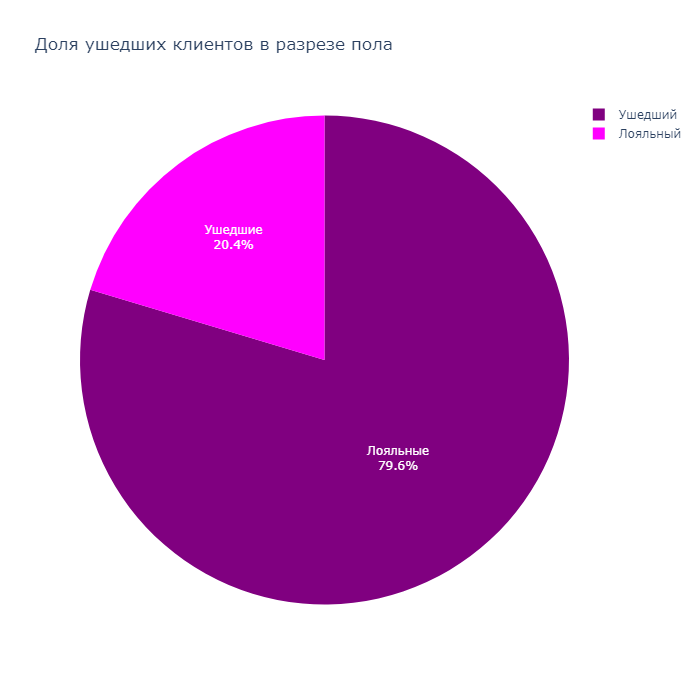

In [13]:
# группируем клиентов по статусу
status_counts = churn_data['Exited'].value_counts(normalize=True)

fig = go.Figure(data=[go.Pie(labels=churn_data['Exited'],
            text=['Лояльные', 'Ушедшие'],
            values=status_counts,
            marker=dict(colors=['purple', 'magenta']))])

fig.update_layout(title='Доля ушедших клиентов в разрезе пола',width=700, height=700)

fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.1.png'))

Вывод: круговая диаграмма иллюстрирует соотношение ушедших и лояльных клиентов. Как видим, соотношение ушедших и лояльных клиентов практически 1:5 соответственно - это высокий уровень оттка, что может свидетельствовать о проблемах с качеством обслуживания клиентов, неудовлетворенности клиентов услугами банка или проблемах с конкуренцией на рынке.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

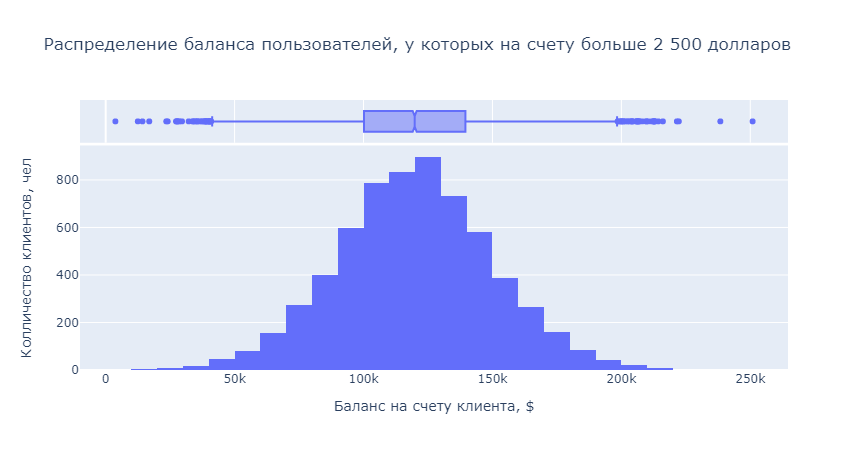

In [14]:
balance = churn_data[churn_data['Balance'] > 2500] #фильтруем датафрейм

fig = px.histogram(
    balance,
    x='Balance',
    marginal='box',
    nbins=30,
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов'
)
fig.update_layout(xaxis_title="Баланс на счету клиента, $", yaxis_title="Колличество клиентов, чел")
fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.2.png'))

Вывод: на графике мы можем увидеть, что распределение баланса пользователей с балансом более 2500 долларов имеет форму, близкую к нормальному распределению. Наиболее часто встречающееся значение баланса находится в диапазоне от 110000 до 120000 долларов. Также можно заметить, что есть несколько значений баланса, которые являются выбросами и находятся далеко от основной массы значений.
Можно сделать вывод, что среди пользователей с балансом более 2500 долларов большинство имеют баланс в диапазоне от 110000 до 120000 долларов, при этом есть несколько пользователей с очень высоким балансом (например "пенёк" 250 898 долларов), которые являются выбросами.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

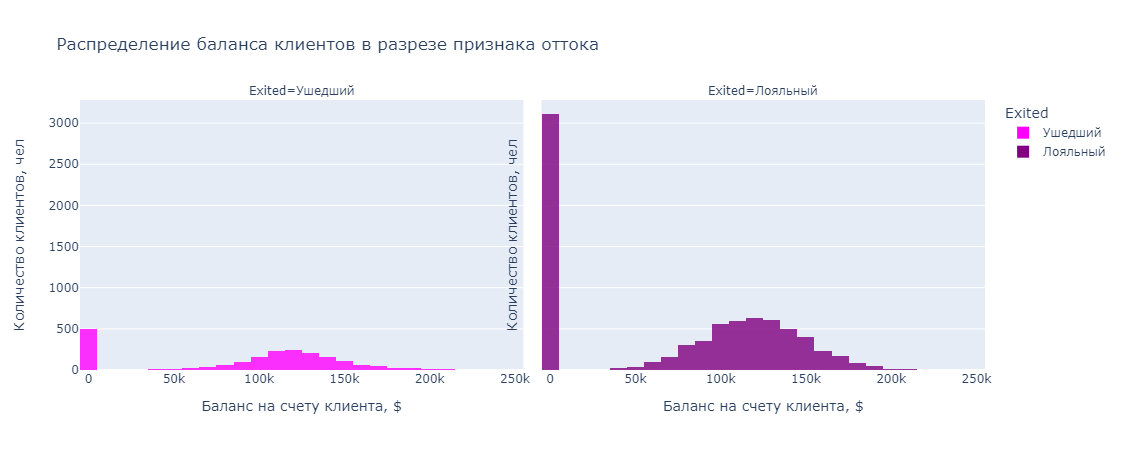

In [15]:
# строим гистограмму
fig = px.histogram(churn_data, x="Balance", facet_col="Exited",
        nbins=50, opacity=0.8,
        barmode="overlay",
        color="Exited",
        color_discrete_sequence=["magenta", "purple"],
        title="Распределение баланса клиентов в разрезе признака оттока")

# добавляем метки осей
fig.update_xaxes(title_text="Баланс на счету клиента, $")
fig.update_yaxes(title_text="Количество клиентов, чел")

# отображаем гистограмму
fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.3.png'))

Вывод: баланс ушедших клиентов ниже, чем у лояльных клиентов, это может быть связано с различными причинами, такими как:
- Недостаточно удобные условия обслуживания
- Высокие комиссии за использование банковских услуг
- Низкое качество обслуживания
- Недостаточно быстрые и эффективные решения проблем клиентов
- Недостаточно широкий выбор банковских продуктов
Также наблюдается большое смещение количества лояльных клиентов к нулю.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

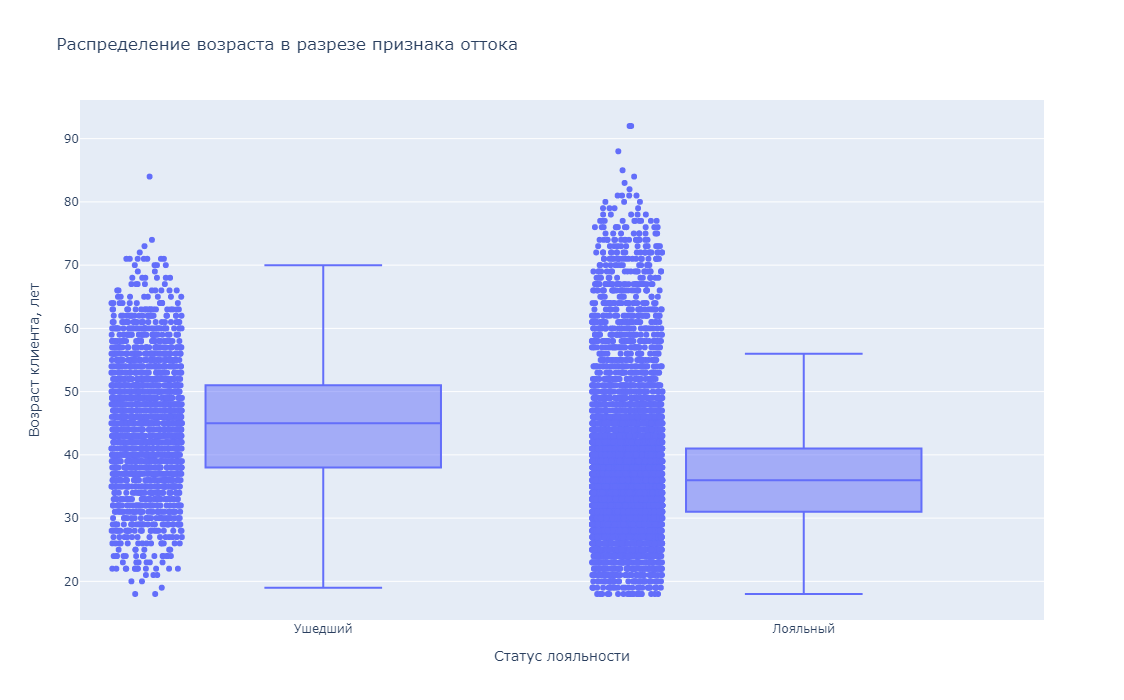

In [16]:
fig = px.box(
    data_frame=churn_data,
    x='Exited',
    y='Age',
    height=700,
    points="all",
    title='Распределение возраста в разрезе признака оттока'
)
fig.update_layout(xaxis_title="Статус лояльности", yaxis_title="Возраст клиента, лет")
fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.4.png'))

Из графика видно, что выбросы есть как в группе ушедших, так и в группе лояльных клиентов. Однако, можно заметить, что ушедшие клиенты имеют немного более широкий диапазон возрастов, а также более высокие значения в медиане и верхней квартиле.

Для того, чтобы более точно определить возрастную категорию клиентов, на которую стоит обратить внимание банку, можно построить дополнительные графики плотности распределения возраста:

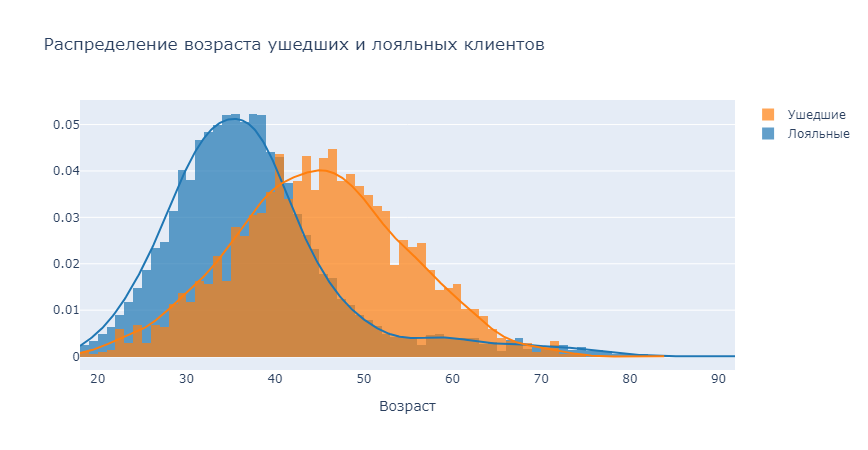

In [17]:
hist_data = [churn_data[churn_data["Exited"] == "Лояльный"]["Age"], churn_data[churn_data["Exited"] == "Ушедший"]["Age"]]
group_labels = ["Лояльные", "Ушедшие"]
fig = ff.create_distplot(hist_data, group_labels, show_hist=True, show_rug=False)
fig.update_layout(title='Распределение возраста ушедших и лояльных клиентов', xaxis_title='Возраст')
fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.41.png'))

Вывод: из графиков видно, что наибольшее количество ушедших клиентов находится в возрастной категории 40-50 лет. Следовательно, банку стоит обратить внимание на эту возрастную группу клиентов.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

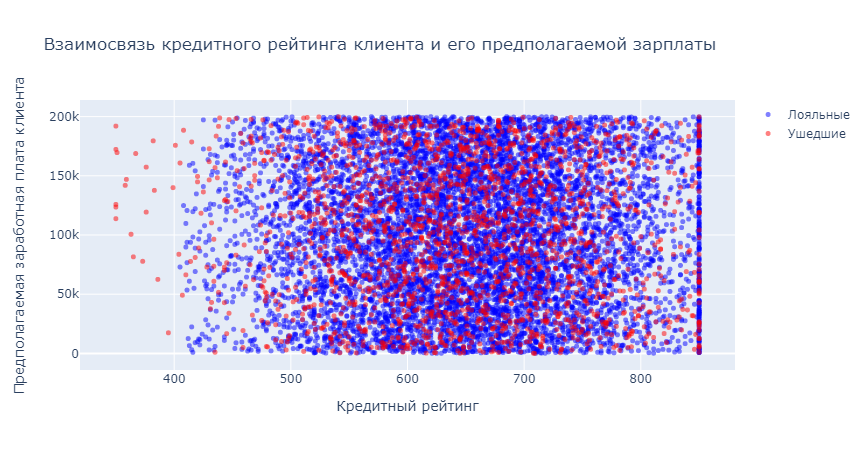

In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=churn_data[churn_data['Exited'] == "Лояльный"]['CreditScore'],
    y=churn_data[churn_data['Exited'] == "Лояльный"]['EstimatedSalary'],
    mode='markers',
    name='Лояльные',
    marker=dict(color='blue', size=5, opacity=0.5)
))

fig.add_trace(go.Scatter(
    x=churn_data[churn_data['Exited'] == "Ушедший"]['CreditScore'],
    y=churn_data[churn_data['Exited'] == "Ушедший"]['EstimatedSalary'],
    mode='markers',
    name='Ушедшие',
    marker=dict(color='red', size=5, opacity=0.5)
))

fig.update_layout(
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты',
    xaxis_title='Кредитный рейтинг',
    yaxis_title='Предполагаемая заработная плата клиента'
)

fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.5.png'))


Вывод: взаимосвязь между признаками не является очевидной и можно сказать, что она отсутствует. Точки на графике распределены без какой-либо определенной зависимости, а выбросы наблюдаются как среди лояльных, так и среди ушедших клиентов. Можно также увидеть, что кредитный рейтинг меньше 400 есть только у ушедших слиетов, и это клиенты со средним или высоким доходом, и заметить большое скопление по верхнему краю лояльных клиентов, что говорит об их высоком кредитном рейтинге, который совершенно не зависит от предположительного дохода клиента.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [21]:

churn_data['Exited'] = churn_data['Exited'].astype('int')
churn_data['Loyal'] = 1 - churn_data['Exited']
grouped_by_exit = churn_data.groupby(['Gender'])[['Exited', 'Loyal']].sum()

fig = px.bar(
    data_frame=grouped_by_exit,
    x=grouped_by_exit.index,
    y=['Exited', 'Loyal'],
    height=500,
    barmode="group"
)

fig.update_layout(
    title='Доля ушедших клиентов в разрезе пола',
    yaxis_title='Количество клиентов, чел.',
    xaxis_title='Пол',
    legend=dict(x=1.1, y=1,
                orientation='h',
                title='Клиенты',
                font=dict(family='Arial', size=12, color='black'),
                itemsizing='constant')
)

fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.6.png'))

ValueError: invalid literal for int() with base 10: 'Ушедший'

Вывод: из диаграммы видно, что женщины чаще уходят, чем мужчины. Однако разница не слишком большая: доля ушедших клиентов среди мужчин составляет около 9% всех пользователей, а среди женщин — 11.4%.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

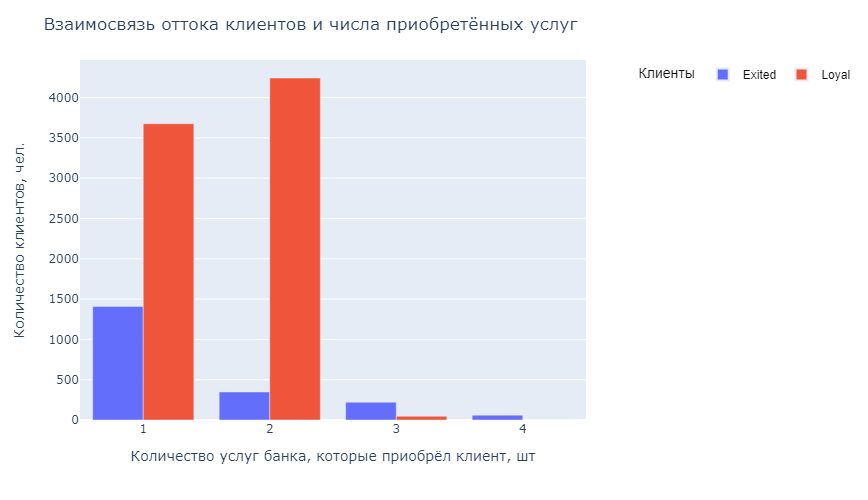

In [22]:
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 0 if x == "Лояльный" else 1)
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda x: 0 if x == "Активный" else 1)
churn_data['Loyal'] = 1 - churn_data['Exited']
grouped_by_exit = churn_data.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum()

fig = px.bar(
    data_frame=grouped_by_exit,
    x=grouped_by_exit.index,
    y=['Exited', 'Loyal'],
    height=500,
    barmode="group"
)

fig.update_layout(
    title='Взаимосвязь оттока клиентов и числа приобретённых услуг',
    yaxis_title='Количество клиентов, чел.',
    xaxis_title='Количество услуг банка, которые приобрёл клиент, шт',
    legend=dict(x=1.1, y=1,
                orientation='h',
                title='Клиенты',
                font=dict(family='Arial', size=12, color='black'),
                itemsizing='constant')
)

fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.7.png'))

Выводы: взаимосвязь оттока клиентов и числа приобретенных услуг является важной для банков, поскольку позволяет понять, как количество услуг, используемых клиентами, влияет на вероятность их ухода из банка.
Диаграмма показывает, что клиенты, использующие больше услуг банка, имеют более высокую лояльность и меньше вероятность ухода. Одна из причин этого может быть связана с тем, что клиенты, использующие несколько услуг банка, могут получать дополнительные преимущества, такие как скидки, бонусы или более высокий уровень обслуживания.
Однако, если клиент использует слишком много услуг, это может быть индикатором того, что он не получает необходимого уровня обслуживания или что он переплачивает за услуги, которые ему не нужны. Это может привести к разочарованию клиента и повысить вероятность его ухода.
Поэтому важно балансировать количество услуг, предлагаемых клиентам, с их потребностями и возможностями. Также стоит учитывать, что каждый банк и его клиенты уникальны, и поэтому оптимальное количество услуг может отличаться для разных банков и клиентов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

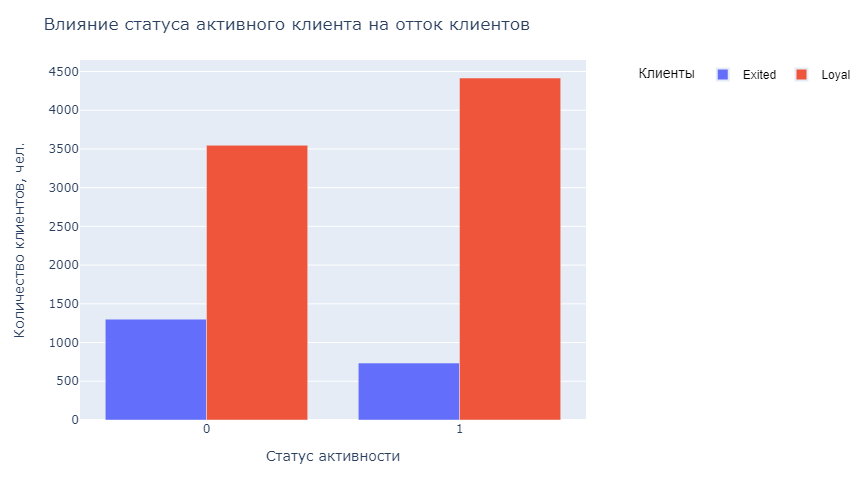

In [23]:
churn_data['Exited'] = churn_data['Exited'].astype('int')
churn_data['Loyal'] = 1 - churn_data['Exited']
grouped_by_exit = churn_data.groupby(['IsActiveMember'])[['Exited', 'Loyal']].sum()

fig = px.bar(
    data_frame=grouped_by_exit,
    x=grouped_by_exit.index,
    y=['Exited', 'Loyal'],
    height=500,
    barmode="group"
)

fig.update_layout(
    title='Влияние статуса активного клиента на отток клиентов',
    yaxis_title='Количество клиентов, чел.',
    xaxis_title='Статус активности',
    legend=dict(x=1.1, y=1,
                orientation='h',
                title='Клиенты',
                font=dict(family='Arial', size=12, color='black'),
                itemsizing='constant')
)

fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.8.png'))

Выводы: на полученной диаграмме видно, что доля ушедших клиентов среди неактивных клиентов выше, чем среди активных клиентов. Это говорит о том, что статус активного клиента может существенно влиять на вероятность оттока клиента. Чтобы уменьшить отток клиентов среди неактивных, банк может принять следующие меры:

1. Активно вовлекать неактивных клиентов в банковские услуги и предоставлять им персонализированные предложения на основе их истории транзакций и поведения.

2. Повышать удобство и доступность банковских услуг для неактивных клиентов, например, через онлайн-банкинг и мобильные приложения.

3. Улучшать обслуживание и качество предоставляемых услуг для всех клиентов, в том числе для неактивных, чтобы повысить их удовлетворенность и лояльность.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

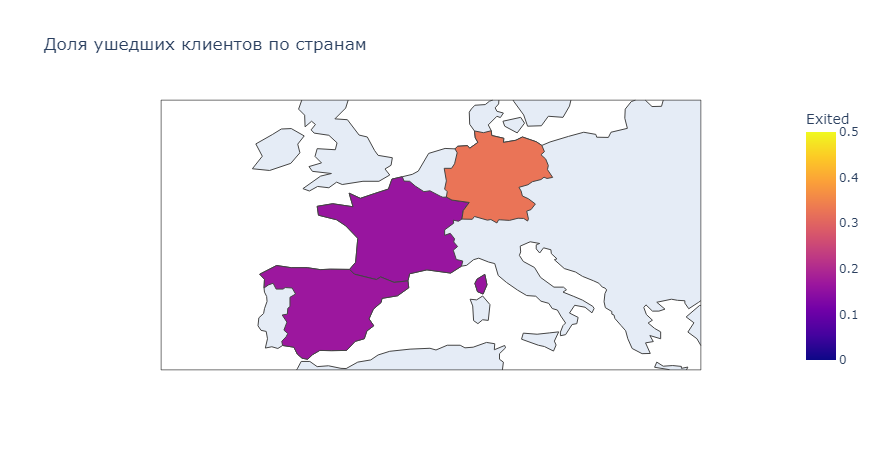

In [24]:
# группируем данные по странам и вычисляем долю ушедших клиентов
churn_countries = churn_data.groupby(['Geography'])['Exited'].mean().reset_index()

# строим тепловую карту с использованием библиотеки plotly
fig = px.choropleth(churn_countries, locations="Geography", color="Exited",
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    range_color=(0, 0.5),
                    hover_name='Geography',
                    title='Доля ушедших клиентов по странам')
fig.show()


display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.9.png'))


Вывод: на полученной тепловой картограмме можно заметить, что доля ушедших клиентов в Германии выше, чем в Испании и во Франции. Возможно, это связано с разными условиями и традициями банковского сектора в этих странах, а также с разным уровнем экономической и политической стабильности.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [25]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data["CreditScoreCat"] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot_table = churn_data.pivot_table(
                index='CreditScoreCat',
                columns='Tenure',
                values='Exited',
                aggfunc='mean')

display(pivot_table)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


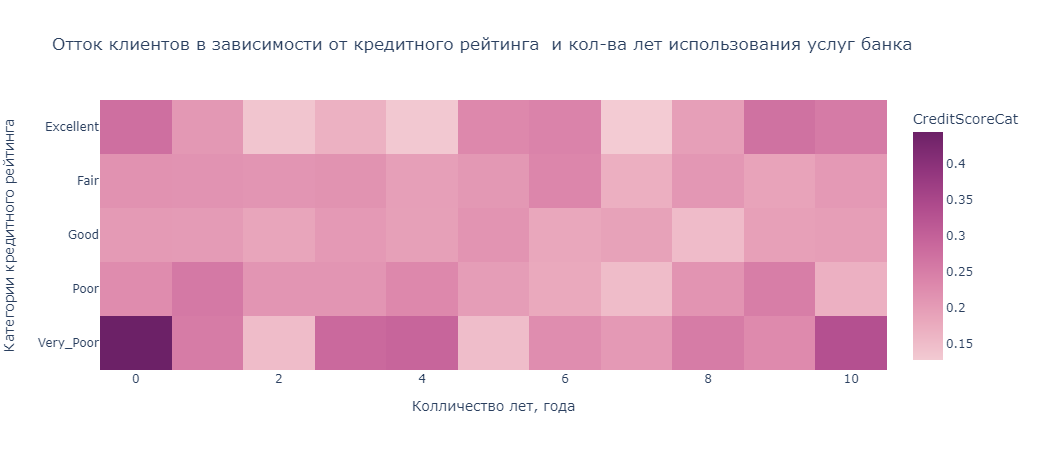

In [ ]:
fig = px.imshow(pivot_table,
                labels=dict(x="Колличество лет, года", y="Категории кредитного рейтинга", color="CreditScoreCat"),
                x=pivot_table.columns.tolist(),
                y=pivot_table.index.tolist(),
                color_continuous_scale='magenta',
                title='Отток клиентов в зависимости от кредитного рейтинга \nи кол-ва лет использования услуг банка')

fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.10.png'))

Вывод: на тепловой карте можно найти категории клиентов, которые уходят чаще всего, по тем ячейкам, в которых значением средней доли оттока будет наибольшее. В нашем случае, такая категория - клиенты с кредитным рейтингом "Very poor", пользующиеся услугами банка в течение 1 года.

Построим также тепловую карту категории клиентов, которые уходят чаще всего, но на счету у которых баланс больше 0.

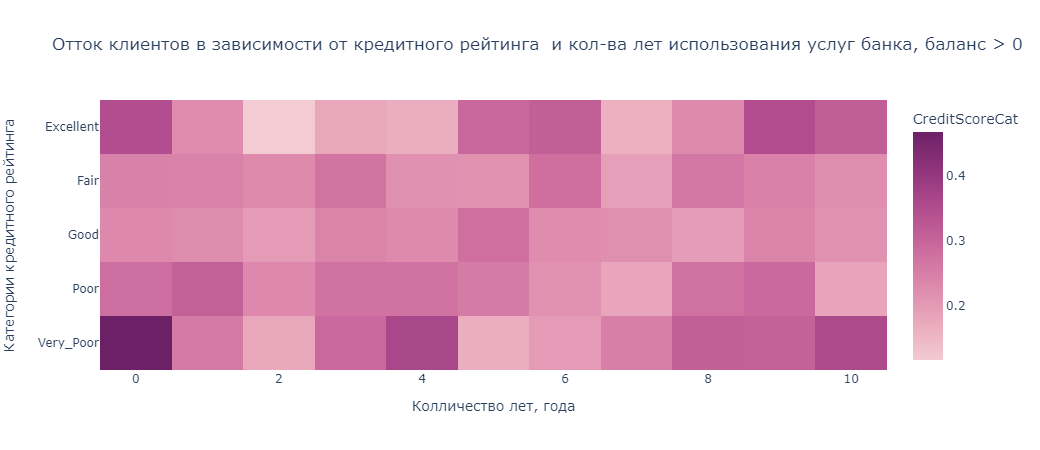

In [26]:
churn_pivot = churn_data[churn_data['Balance'] > 0].pivot_table(values='Exited', 
                                                                 index='CreditScoreCat', 
                                                                 columns='Tenure', 
                                                                 aggfunc='mean')

fig = px.imshow(churn_pivot,
                labels=dict(x="Колличество лет, года", y="Категории кредитного рейтинга", color="CreditScoreCat"),
                x=churn_pivot.columns,
                y=churn_pivot.index,
                color_continuous_scale='magenta',
                title='Отток клиентов в зависимости от кредитного рейтинга nи кол-ва лет использования услуг банка, баланс > 0')

fig.show()

display(Image(filename='D:\DS\Skillfactory_jupiter_notebook\PYTHON-13.Vizualization_data\data\9.11.png'))


Вывод: выполнив фильтрацию данных о балансе клиентов, у которых на счету баланс больше 0 можно увидеть, что эти клиенты уходят чаще, чем те, у которых на балансе 0. Существует несколько возможных причин, почему так происходит:
- Неудовлетворительное качество обслуживания. Клиенты, у которых есть деньги на счету, могут ожидать более высокого уровня сервиса и большего внимания со стороны банка. Если они не получают такого обслуживания, они могут решить перейти к другому банку.
- Высокие процентные ставки на кредиты. Клиенты, у которых есть деньги на счету, могут обратить внимание на высокие процентные ставки на кредиты, которые предлагает банк, и решить воспользоваться услугами другого банка.
- Низкая доходность вкладов и инвестиционных продуктов. Клиенты, у которых есть деньги на счету, могут ожидать более высокой доходности от своих вкладов и инвестиционных продуктов. Если банк не может предложить им такую доходность, они могут решить перейти к другому банку.
- Удобство и качество онлайн-банкинга. Клиенты, у которых есть деньги на счету, могут обратить внимание на удобство и качество онлайн-банкинга, который предлагает банк. Если банк не предоставляет удобные и качественные онлайн-сервисы, клиенты могут решить перейти к другому банку.

### Общий вывод:
- Были выяснены основные причины оттока клиентов и установлено, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. На основе анализа банку будут переданы исследования для разработки кампании лояльности по удержанию клиентов и дальнейшего построения модели машинного обучения, которая будет прогнозировать уход клиента.
- При выполнении заданий для визуализации использовалась библиотека Plotly, преимуществом которой является возможность строить интерактивные графики, которые можно приближать, отдалять, а также просматривать значения на графике в реальном времени, к тому же в библиотеке собрано огромнейшее количество красочных методов визуализации, включая интерактивную 3D-визуализацию, карту мира и многое другое.